<a href="https://colab.research.google.com/github/hemanshu16/ML_Labs/blob/main/ML_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/SEM-6/ML/lab-7/BuyComputer.csv')
data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [55]:
#Declare label as last column in the source file
lable = data.iloc[:,[2]]
print(lable)
x  = data.iloc[:,[0,1]]
print(x)

     Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]
     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [66]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, lable, test_size=0.05, random_state=0)
y_train = y_train.to_numpy()



In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# print(X_test)
# print(X_train)

In [86]:
theta = np.array([0.1025,0.508])
b = 0.875
y_bar = []
x_bar = []
def sigmoid(x) :
  z = x@np.transpose(theta) + b
  x_bar.append(z)
  y_bar.append(1/(1 + np.exp(-z)))

for x in X_train :
  sigmoid(x)
print(y_bar)
print(x_bar)

# plt.ylabel("sigmoid(x)")
# plt.xlabel("x")
# plt.plot(x_bar,y_bar)
# plt.show()

[0.6241613502087858, 0.8879762115907187, 0.6514541810332143, 0.815914781931455, 0.5267019277844104, 0.8854453198530049, 0.7379132640255455, 0.7192151362807457, 0.6792563614496038, 0.7425546079186276, 0.7274513528832043, 0.7317959148320274, 0.7141781161103343, 0.6493549614595377, 0.6373409383580266, 0.6024877939095611, 0.7083018858894075, 0.6077502391529087, 0.5681804033768448, 0.6177335110883525, 0.7389070320435389, 0.6548310094280761, 0.7272416819581068, 0.5261747709832241, 0.82552057607088, 0.6440816947520235, 0.7347113407374594, 0.7882034581873149, 0.541405862118891, 0.7729816639316848, 0.8629389397829508, 0.5422893485177755, 0.6584301071462358, 0.8192206376281551, 0.794561752541854, 0.5941800107335015, 0.7281563851403562, 0.7132638560334659, 0.5892083038225229, 0.4969159801827866, 0.5114231841269407, 0.6630115174764227, 0.6863994419821596, 0.7845035544059913, 0.5095124275502704, 0.7837877357096878, 0.7361238462162621, 0.6440816947520235, 0.6355389318054468, 0.7147173557347654, 0.88

In [85]:
#Loss function
def loss_func(y,y_bar):
  return -(y*np.log(y_bar) + (1-y)*np.log(1-y_bar))

loss = 0
n = len(X_train)
alpha = 0.1/n
i = 0;
m = len(y_train)

print(theta)
newtheta = [0,0]
for i in range(0,m):
  loss = loss + ((y_bar[i]-y_train[i])*X_train[i][0])

newtheta[0] = theta[0] - loss*alpha

loss = 0
for i in range(0,m):
  loss = loss + ((y_bar[i]-y_train[i])*X_train[i][1])

newtheta[1] = theta[1] - loss*alpha

for i in range(0,m):
  loss = loss + ((y_bar[i]-y_train[i])*X_train[i][1])

newb = b - loss*alpha
print(newb)
loss = 0

print(newtheta)




[0.1025 0.508 ]
[0.8893084]
[array([0.12906043]), array([0.5151542])]


In [92]:
for i in range(3000) :
  y_bar = []
  x_bar = []
  def sigmoid(x) :
    z = x@np.transpose(theta) + b
    x_bar.append(z)
    y_bar.append(1/(1 + np.exp(-z)))

  for x in X_train :
    sigmoid(x)

  loss = 0
  n = len(X_train)
  alpha = 0.1/n
  i = 0;
  m = len(y_train)

  
  for i in range(0,m):
    loss = loss + ((y_bar[i]-y_train[i])*X_train[i][0])

  theta[0] = theta[0] - loss*alpha

  loss = 0
  for i in range(0,m):
    loss = loss + ((y_bar[i]-y_train[i])*X_train[i][1])

  theta[1] = theta[1] - loss*alpha
  loss = 0
  for i in range(0,m):
    loss = loss + ((y_bar[i]-y_train[i])*X_train[i][1])

  newb = b - loss*alpha
  loss = 0
  b = newb



[array([0.99901251]), array([1.]), array([1.]), array([1.]), array([4.04765293e-14]), array([1.]), array([0.99688508]), array([0.99553702]), array([0.99999999]), array([0.99999979]), array([1.21386942e-05]), array([1.]), array([1.]), array([0.99999943]), array([1.0391694e-07]), array([2.74726762e-15]), array([8.46074212e-06]), array([0.94188058]), array([0.00022693]), array([1.]), array([0.97534015]), array([1.]), array([0.88524713]), array([0.01608454]), array([1.]), array([0.00018754]), array([1.]), array([1.]), array([1.6543592e-10]), array([1.]), array([1.]), array([0.01025199]), array([0.99998339]), array([1.]), array([1.]), array([1.]), array([0.99868599]), array([0.10998547]), array([1.]), array([1.53983405e-15]), array([3.99965439e-06]), array([1.]), array([6.07557074e-10]), array([1.]), array([8.13352214e-19]), array([1.]), array([0.031919]), array([0.00018754]), array([1.]), array([1.]), array([1.]), array([1.]), array([5.4078059e-09]), array([1.]), array([0.98347537]), array

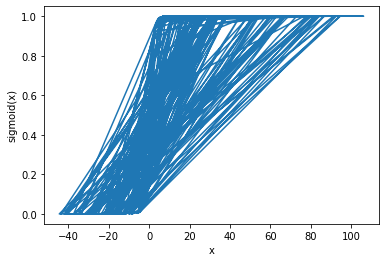

In [93]:
y_bar = []
x_bar = []
def sigmoid(x) :
  z = x@np.transpose(theta) + b
  x_bar.append(z)
  y_bar.append(1/(1 + np.exp(-z)))

for x in X_train :
  sigmoid(x)
print(y_bar)
print(x_bar)

plt.ylabel("sigmoid(x)")
plt.xlabel("x")
plt.plot(x_bar,y_bar)
plt.show()